[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

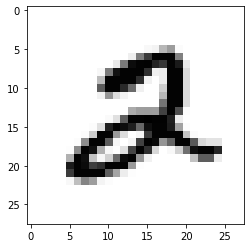

In [1]:
import numpy
""" scipy.special for the sigmoid function expit() """
import scipy.special
import matplotlib.pyplot
""" ensure the plots are inside this notebook, not an external window """
%matplotlib inline

#open test file
data_file=open('mnist_train_100.csv','r')
data_list=data_file.readlines()
data_file.close

all_values=data_list[5].split(',')

scaled_input=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
print(scaled_input)

image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation='none')



In [2]:
import numpy
""" scipy.special for the sigmoid function expit() """
import scipy.special
import matplotlib.pyplot
""" ensure the plots are inside this notebook, not an external window """
%matplotlib inline



#initialise network class definition
class neuralNetwork:
    #initialise the neural network
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        """ link weight matrices,wih and who;
         weights inside the arrays are w_i_j , where link is from node i to node j in the next layer
         w11 w21 w12 w22 etc """
        self.wih=(numpy.random.rand(self.hnodes,self.inodes)-0.5)
        self.who=(numpy.random.rand(self.onodes,self.hnodes)-0.5)
        """ activate function is sigmoid function """
        self.activation_function=lambda x:scipy.special.expit(x)

        pass
   
   
   
   
    # train the neural network
    def train (self,inputs_list,targets_list):
       """ convert inputs list to 2d array """
       inputs=numpy.array(inputs_list,ndmin=2).T
       targets=numpy.array(targets_list,ndmin=2).T


       """ calculate signals into hidden layer """
       hidden_inputs=numpy.dot(self.wih,inputs)

       """ calculate the signals emerging from hidden layer """
       hidden_outputs=self.activation_function(hidden_inputs)

       """ calculate signals into final output layer """
       final_inputs=numpy.dot(self.who,hidden_outputs)

       """ calculate the signals emerging from final output layer """
       final_outputs=self.activation_function(final_inputs)

       """ error is (target-actual) """
       output_errors=targets-final_outputs

       """ hiddden layer error is the output_errors,split by weights,recombined at hidden nodes """
       hidden_errors=numpy.dot(self.who.T,output_errors)

       """ update the weights for the links between the hidden and output layers """
       self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
       
       """ update the weights for the links between the input and hidden layers """
       self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(inputs))
       pass




    #query the neural network
    def query(self,inputs_list):
       """ convert inputs list to 2d array """
       inputs=numpy.array(inputs_list,ndmin=2).T

       """ calculate signals into hidden layer """
       hidden_inputs=numpy.dot(self.wih,inputs)

       """ calculate the signals emerging from hidden layer """
       hidden_outputs=self.activation_function(hidden_inputs)

       """ calculate signals into final output layer """
       final_inputs=numpy.dot(self.who,hidden_outputs)

       """ calculate the signals emerging from final output layer """
       final_outputs=self.activation_function(final_inputs)

       return final_outputs
       

#number of input,hidden and output nodes
input_nodes=784
hidden_nodes=100
output_nodes=10

#learning rate
learning_rate=0.2

# create instance of neural network
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


#open training file ,load it into a list 
training_data_file=open('mnist_train.csv','r')
training_data_list=training_data_file.readlines()
training_data_file.close



for record in training_data_list:
    all_values=record.split(',')
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    targets=numpy.zeros(output_nodes)+0.01
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)





In [3]:
#open test file ,load it into a list 
test_data_file=open('mnist_test.csv','r')
test_data_list=test_data_file.readlines()
test_data_file.close


scorecard=[]
for record in test_data_list:
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print("correct label:", correct_label)
    inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs=n.query(inputs)
    label=numpy.argmax(outputs)
    print("network answer label:", label)
    if correct_label==label:
        scorecard.append(1)
    else:
        scorecard.append(0)

#print(scorecard)
#calculate the performance score
scorecard_array=numpy.asarray(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)


#all_values=test_data_list[0].split(',') 
#print(all_values[0])

#image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
#matplotlib.pyplot.imshow(image_array,cmap="Greys",interpolation='none')

#n.query((numpy.asfarray(all_values[1:])/255.0*0.99)+0.01) """

correct label: 7
network answer label: 7
correct label: 2
network answer label: 2
correct label: 1
network answer label: 1
correct label: 0
network answer label: 0
correct label: 4
network answer label: 4
correct label: 1
network answer label: 1
correct label: 4
network answer label: 4
correct label: 9
network answer label: 9
correct label: 5
network answer label: 6
correct label: 9
network answer label: 9
correct label: 0
network answer label: 0
correct label: 6
network answer label: 6
correct label: 9
network answer label: 9
correct label: 0
network answer label: 0
correct label: 1
network answer label: 1
correct label: 5
network answer label: 5
correct label: 9
network answer label: 9
correct label: 7
network answer label: 7
correct label: 3
network answer label: 3
correct label: 4
network answer label: 4
correct label: 9
network answer label: 9
correct label: 6
network answer label: 6
correct label: 6
network answer label: 6
correct label: 5
network answer label: 5
correct label: 4